In [26]:
##导入会使用到的库
%config InlineBackend.figure_format ='retina'
%matplotlib inline
import seaborn as sns
sns.set (font="simhei",style="whitegrid",font_scale=1.6)
import matplotlib
# matplotlib.rcParams['axes.nicode_minus']-False#解坐标轴的负号最示问题
##导入需要的库
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei']#设置中文产体
plt.rcParams['font.family']='sans-serif'#使用san5-5erif产体族
plt.rcParams['font.serif']=['Times New Roman']#设里英文乎体为了ines Ney Roman
# plt.rcParams['axes.nicode_minus']=False#防止负号显示成方块
##忽略提醒
import warnings
warnings.filterwarnings("ignore")

df1 =pd.read_csv('2025_Problem_C_Data\\summeroly_athletes.csv',encoding="windows-1252")
df2 =pd.read_csv('2025_Problem_C_Data\\summeroly_hosts.csv',encoding="windows-1252")
df3 =pd.read_csv('2025_Problem_C_Data\\summeroly_medal_counts.csv',encoding="windows-1252")
df4 =pd.read_csv('2025_Problem_C_Data\\summeroly_programs.csv',encoding="windows-1252")

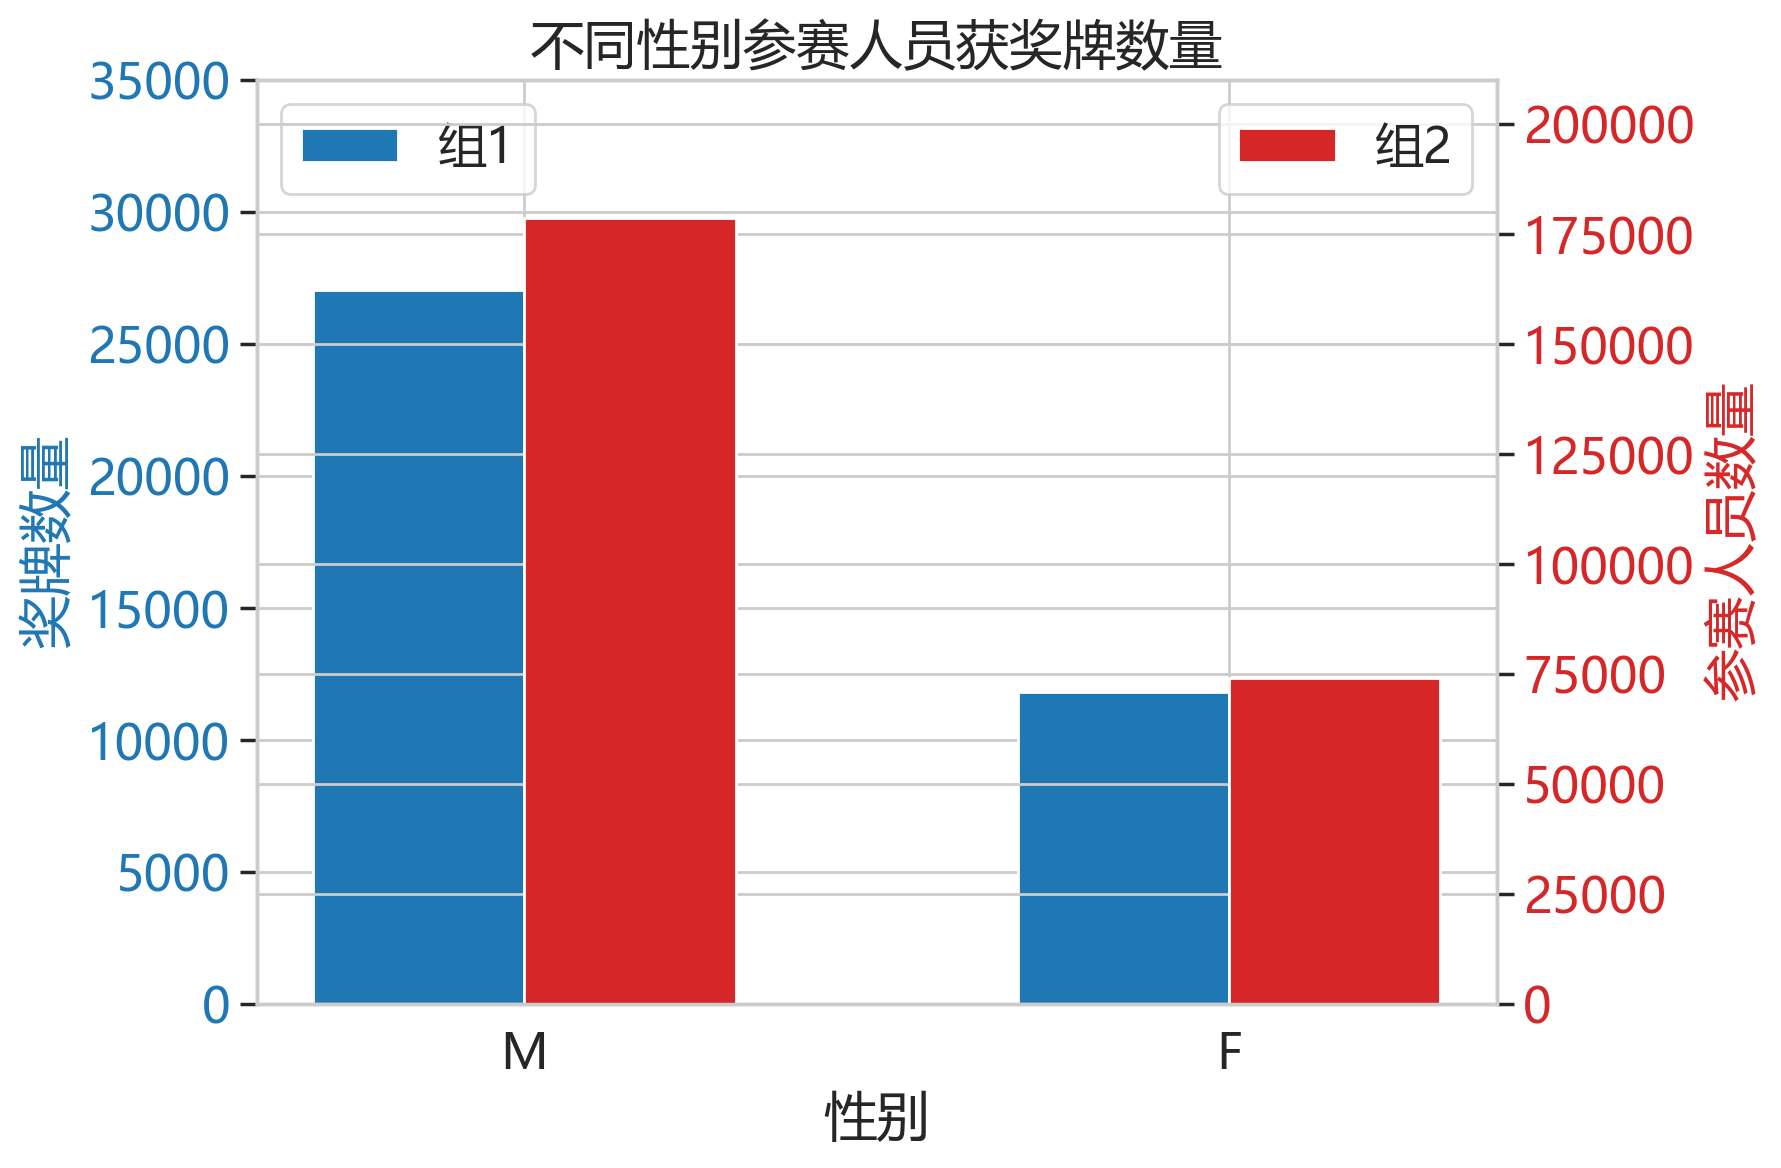

In [11]:

tem =df1[df1.Medal !=  'No medal']

import matplotlib.pyplot as plt
import numpy as np
#示例数据
categories = tem['Sex'].value_counts().index #类别标签
values1=tem['Sex'].value_counts().values#第-组数据
values2=df1['Sex'].value_counts().values#第二组数据
#设置位置
x = np.arange(len(categories))#类别的位置
width=0.3 #每组条形留的觉度
#创星留形和两个y轴
fig,ax1= plt.subplots(figsize=(8,6))
#尝制第一组数据的条形图
color ='tab:blue'
bars1= ax1.bar (x-width/2,values1,width,label='组1',color=color)
ax1.set_xlabel('性别')
ax1.set_ylabel('奖牌数量',color=color)
ax1.set_xticks(x) #设置x轴的刻度位置为离散的类别
ax1.set_xticklabels(categories)  #设置x轴的刻度标签
ax1.set_ylim(0,35000)  #设置y轴范鼠从0到30
ax1.tick_params(axis='y', labelcolor=color)
#创建第二个y轴并绘制第二组数据的条形图
ax2 =ax1.twinx()  #创建共享x轴的第二个y轴
color = 'tab:red'
bars2 = ax2.bar (x+width/2, values2, width, label='组2',  color=color)
ax2.set_ylabel('参赛人员数量',color=color)
ax2.tick_params(axis='y',labelcolor=color)
ax2.set_ylim(0,210000)  #设置y轴范围从0到30
#添加标题
plt.title('不同性别参赛人员获奖牌数量')
#添加图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

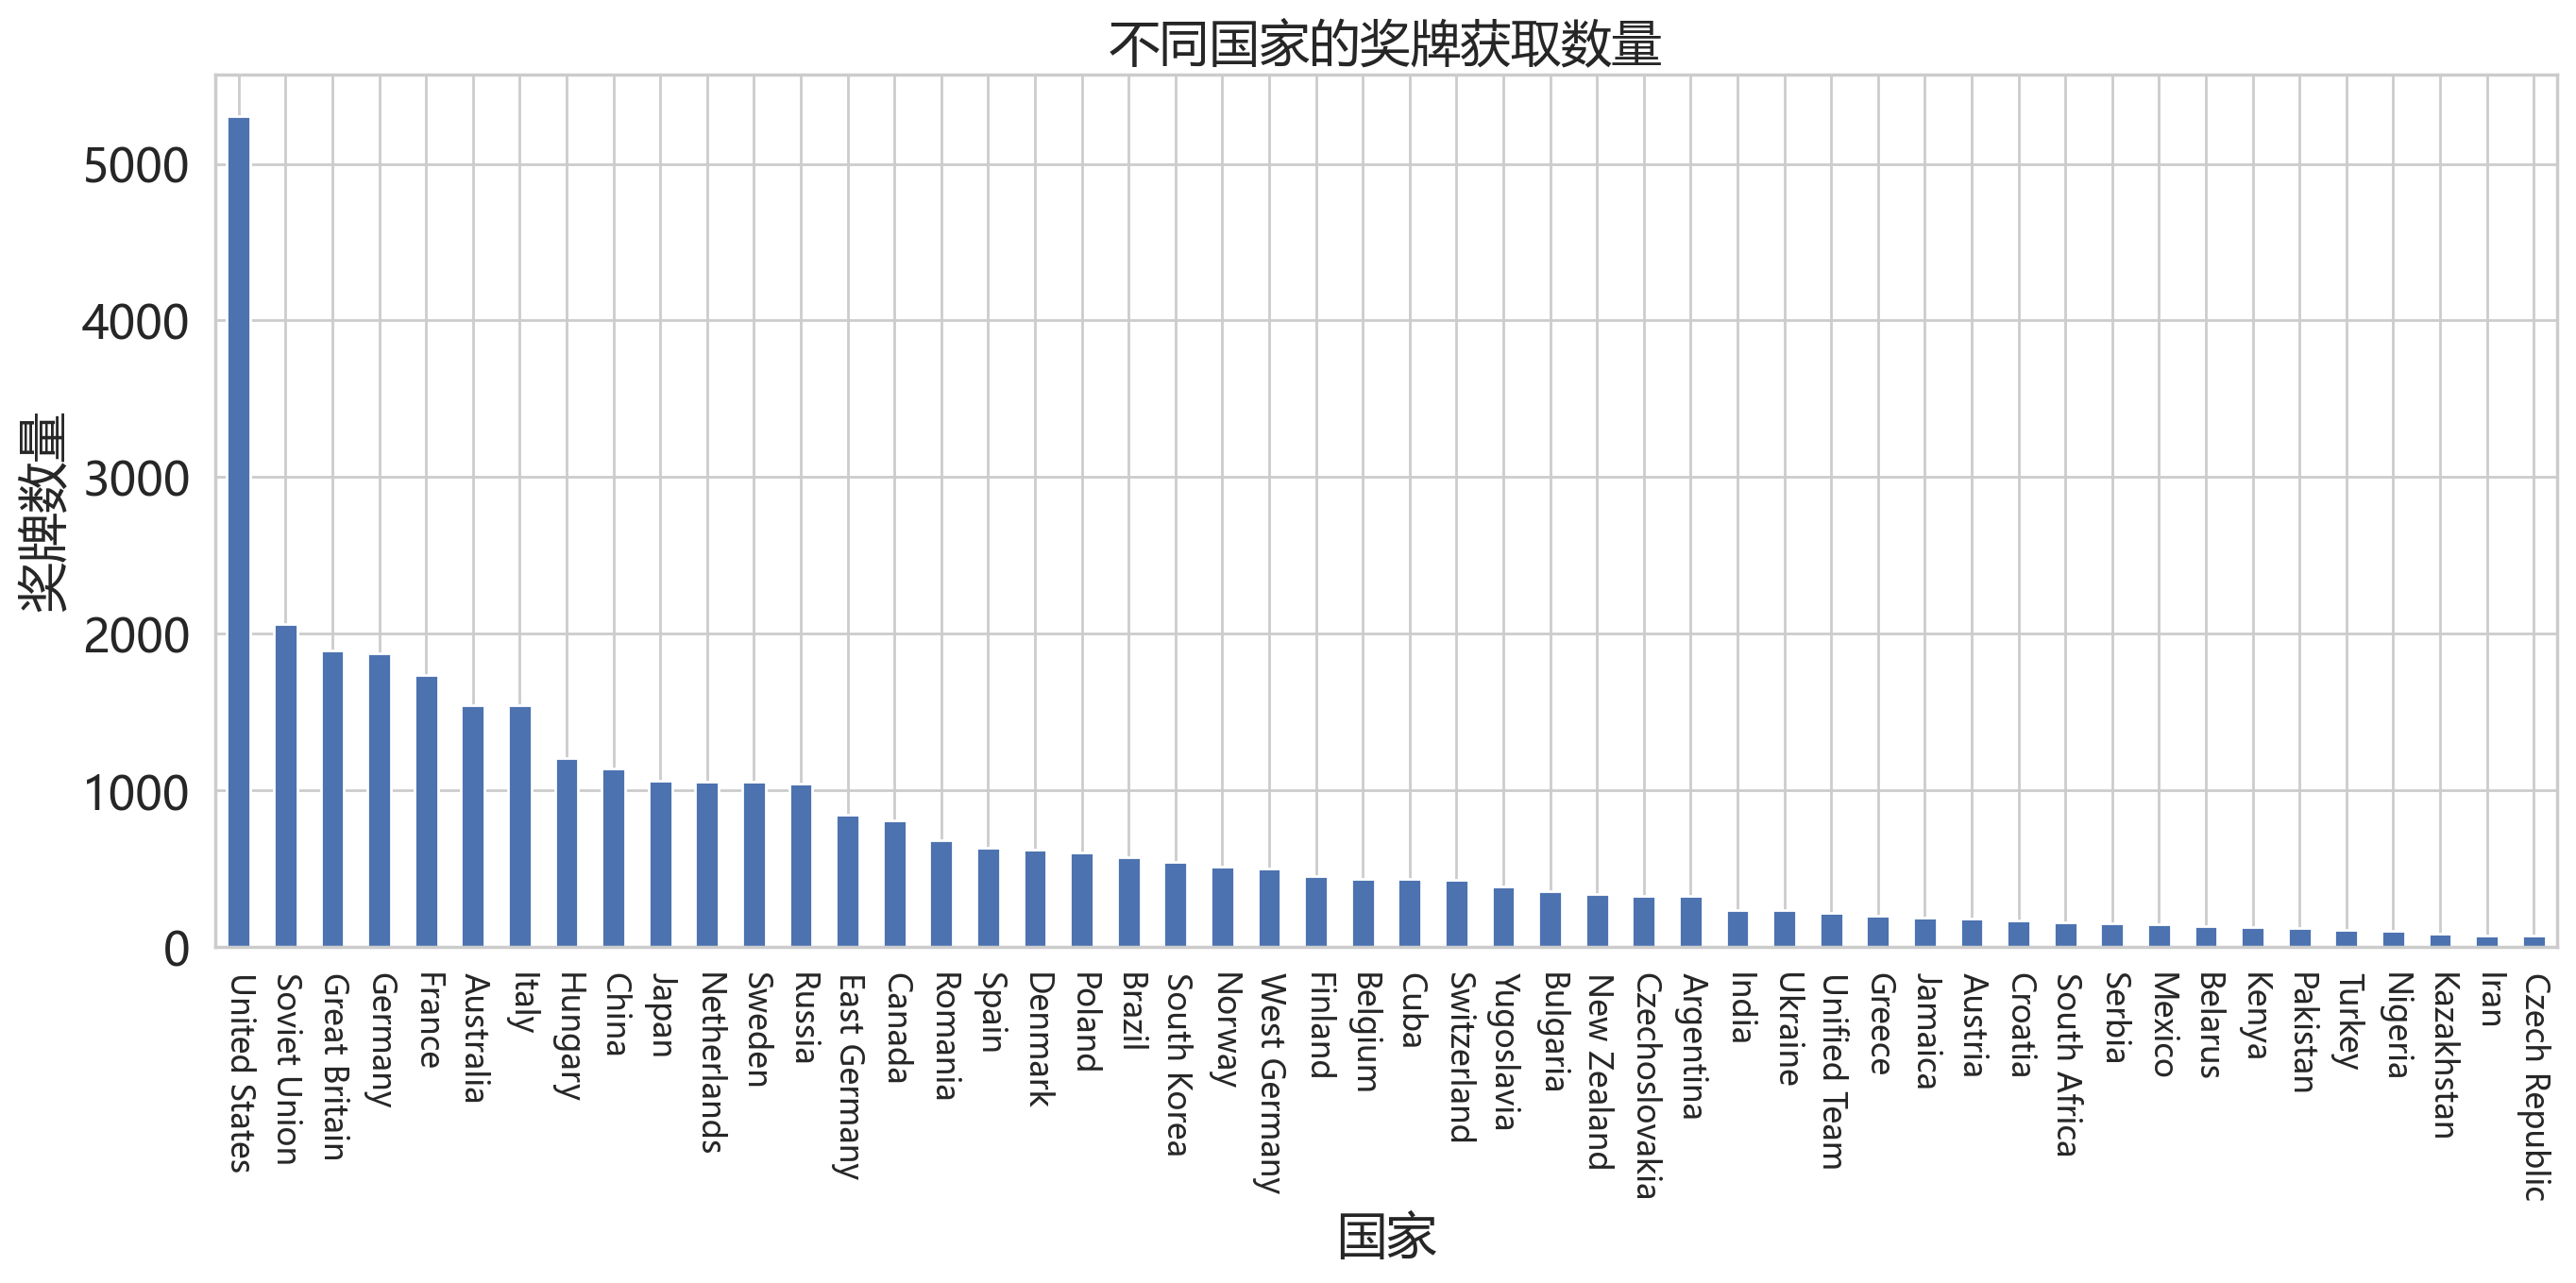

In [12]:



tem["Team"].value_counts()[:50].plot (kind = "bar",figsize =(16,6))   #颜色.matplotlib
plt.xlabel('国家')
plt.ylabel("奖牌数量")
plt.xticks(rotation = 270,fontsize = 12)
plt.title('不同国家的奖牌获取数量')
plt.savefig('不同国家的奖牌获取数量.png',dpi=500,bbox_inches='tight')
plt.show()


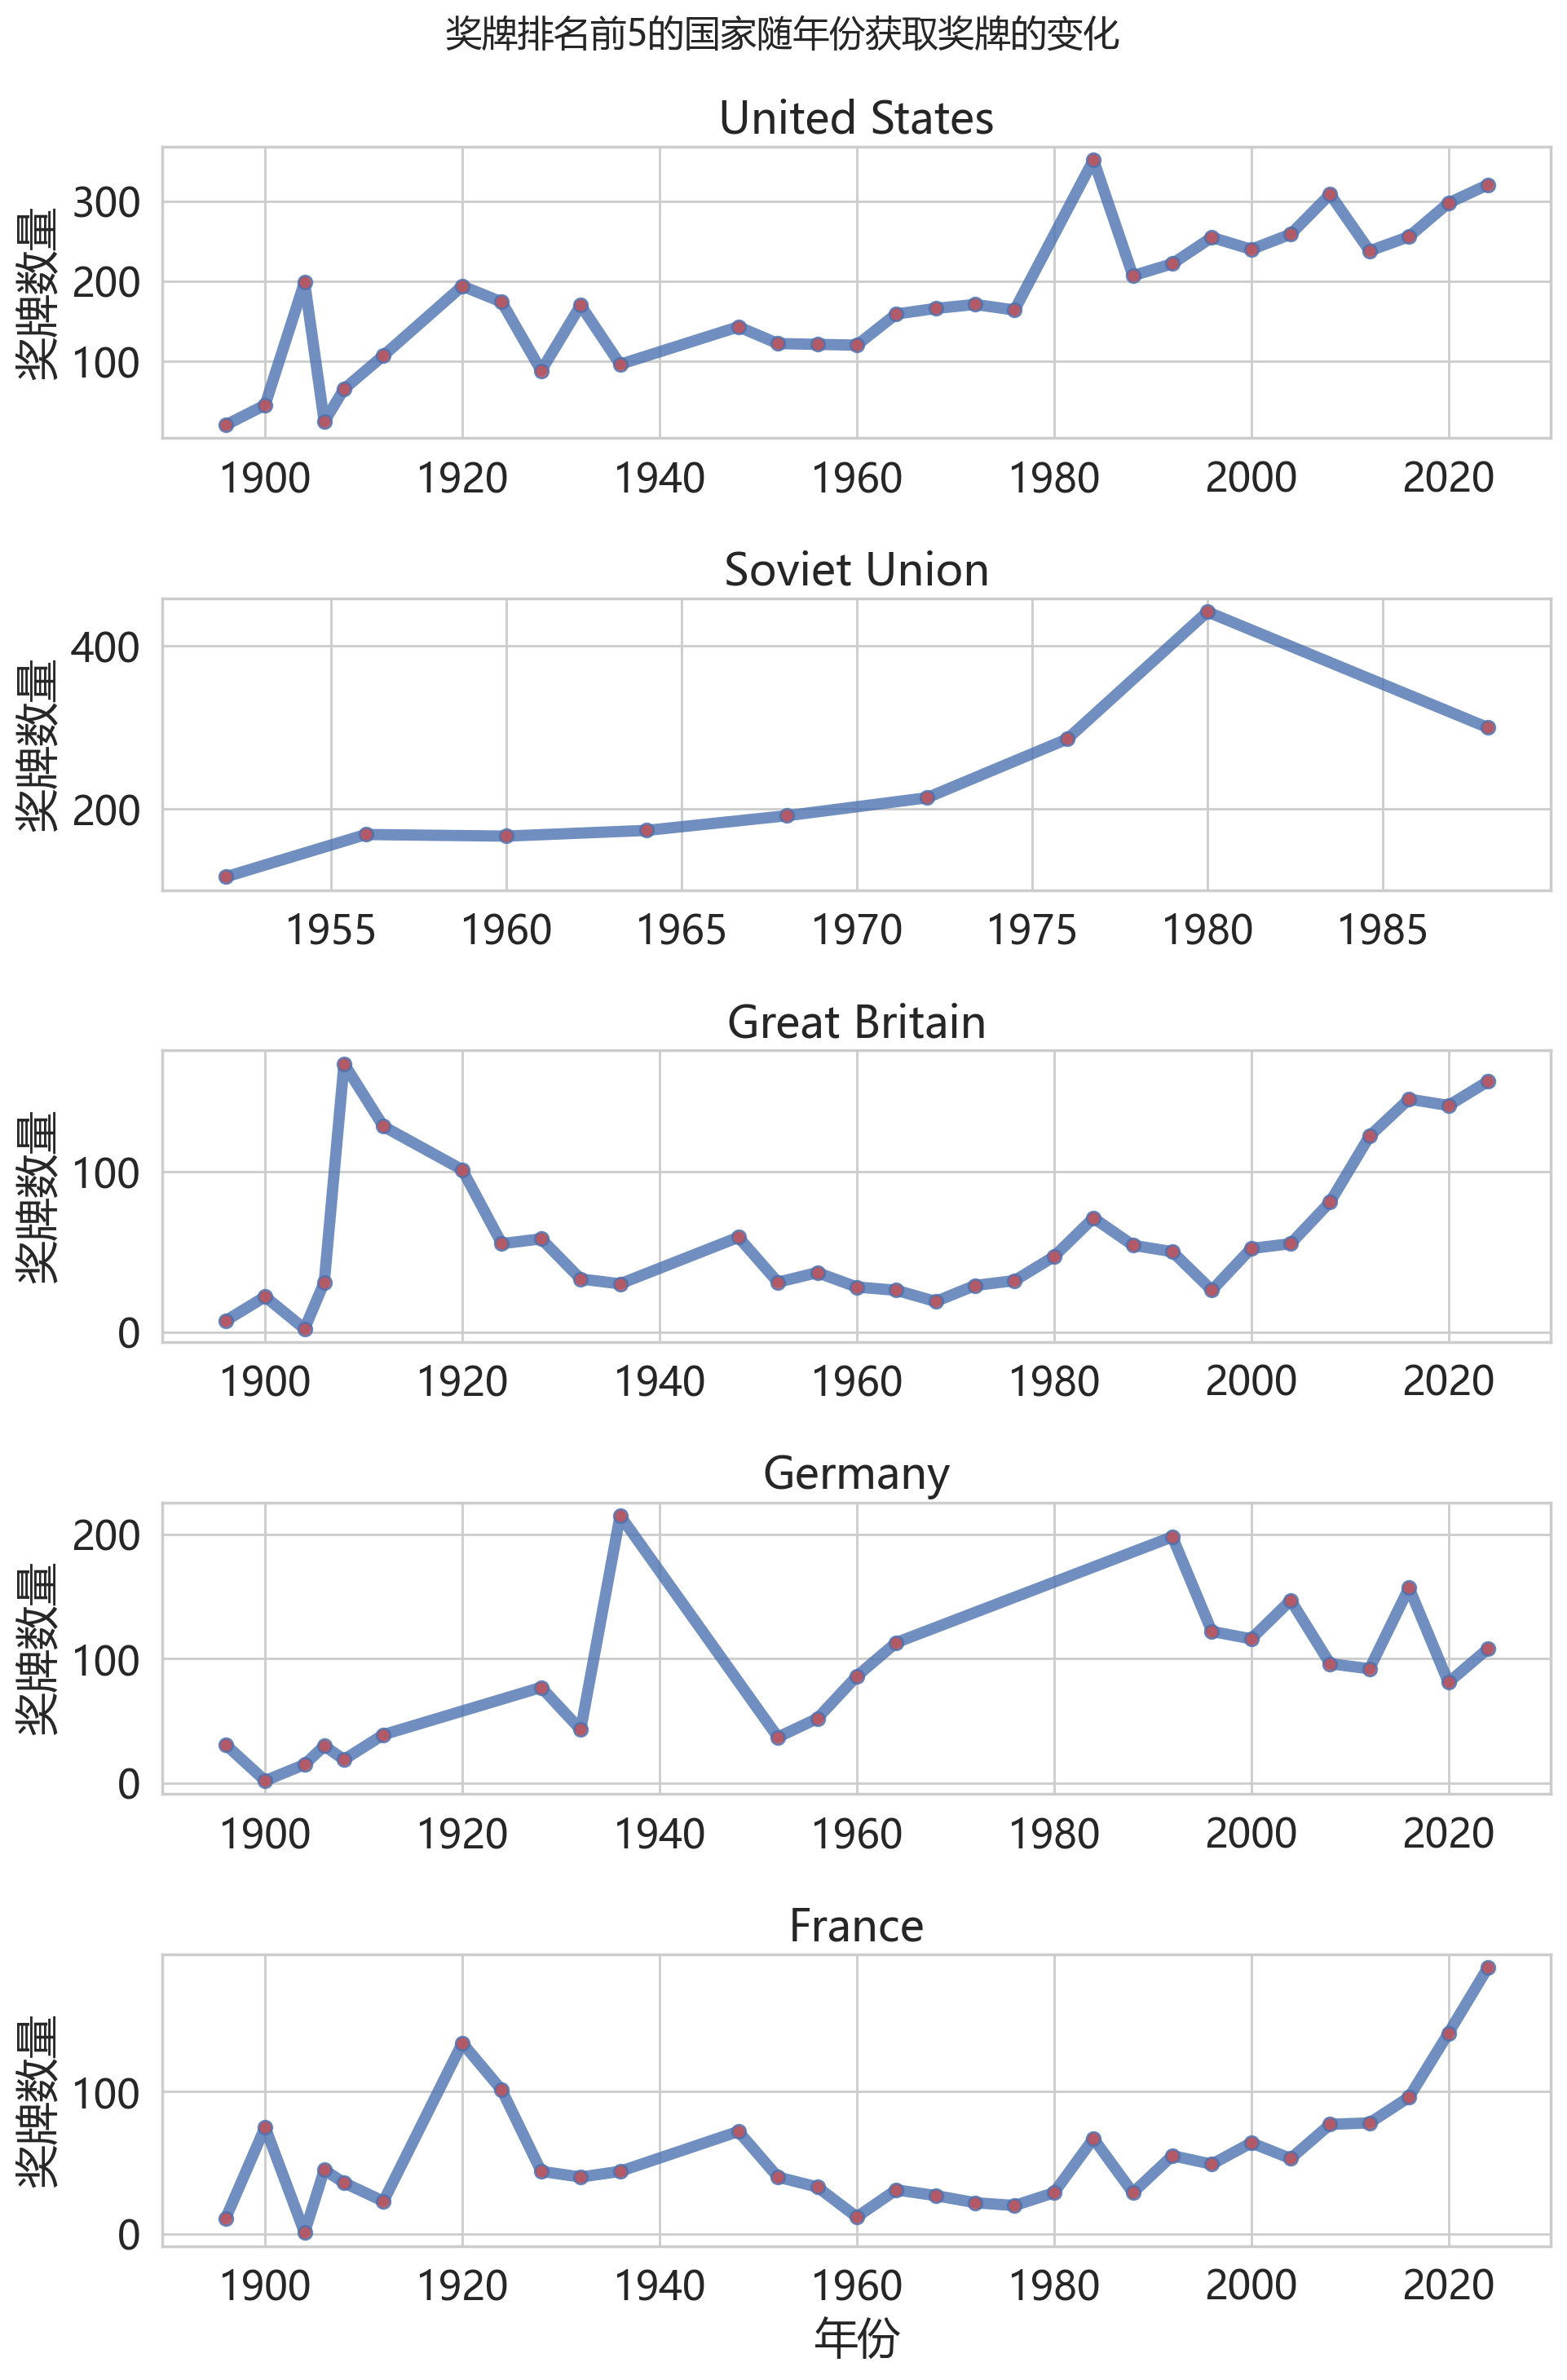

In [14]:


ls = tem["Team"].value_counts().index[:5]
tem2 = tem[tem.Team.isin(ls)]
tem2 = tem2.groupby(['Team','Year']).count()['Medal'].reset_index()
#创建一个1列5行的子图
fig,axes = plt.subplots(5,1,figsize=(10,15))  #5行1列的子图，图形大小为8x15

for index1,i in enumerate(ls):
    x  = tem2[tem2.Team==i]['Year'].values
    y1 = tem2[tem2.Team==i]['Medal'].values
    axes[index1].set_ylabel('奖牌数量')  #为y轴添加标签

    # 绘制每个子图
    axes[index1].plot(x, y1, linestyle='-', marker='o', markerfacecolor='r', alpha=0.8, linewidth = 5)
    axes[index1].set_title(i)

    if index1 == len(ls)-1:
        axes[index1].set_xlabel('年份')  # 为y轴添加标签
fig.suptitle('奖牌排名前5的国家随年份获取奖牌的变化',fontsize=16)
#自动调整子图间的间距
plt.tight_layout ()
plt.savefig('奖牌排名前5的国家随年份获取奖牌的变化.png',dpi=500,bbox_inches='tight')
#显示图形
plt.show()


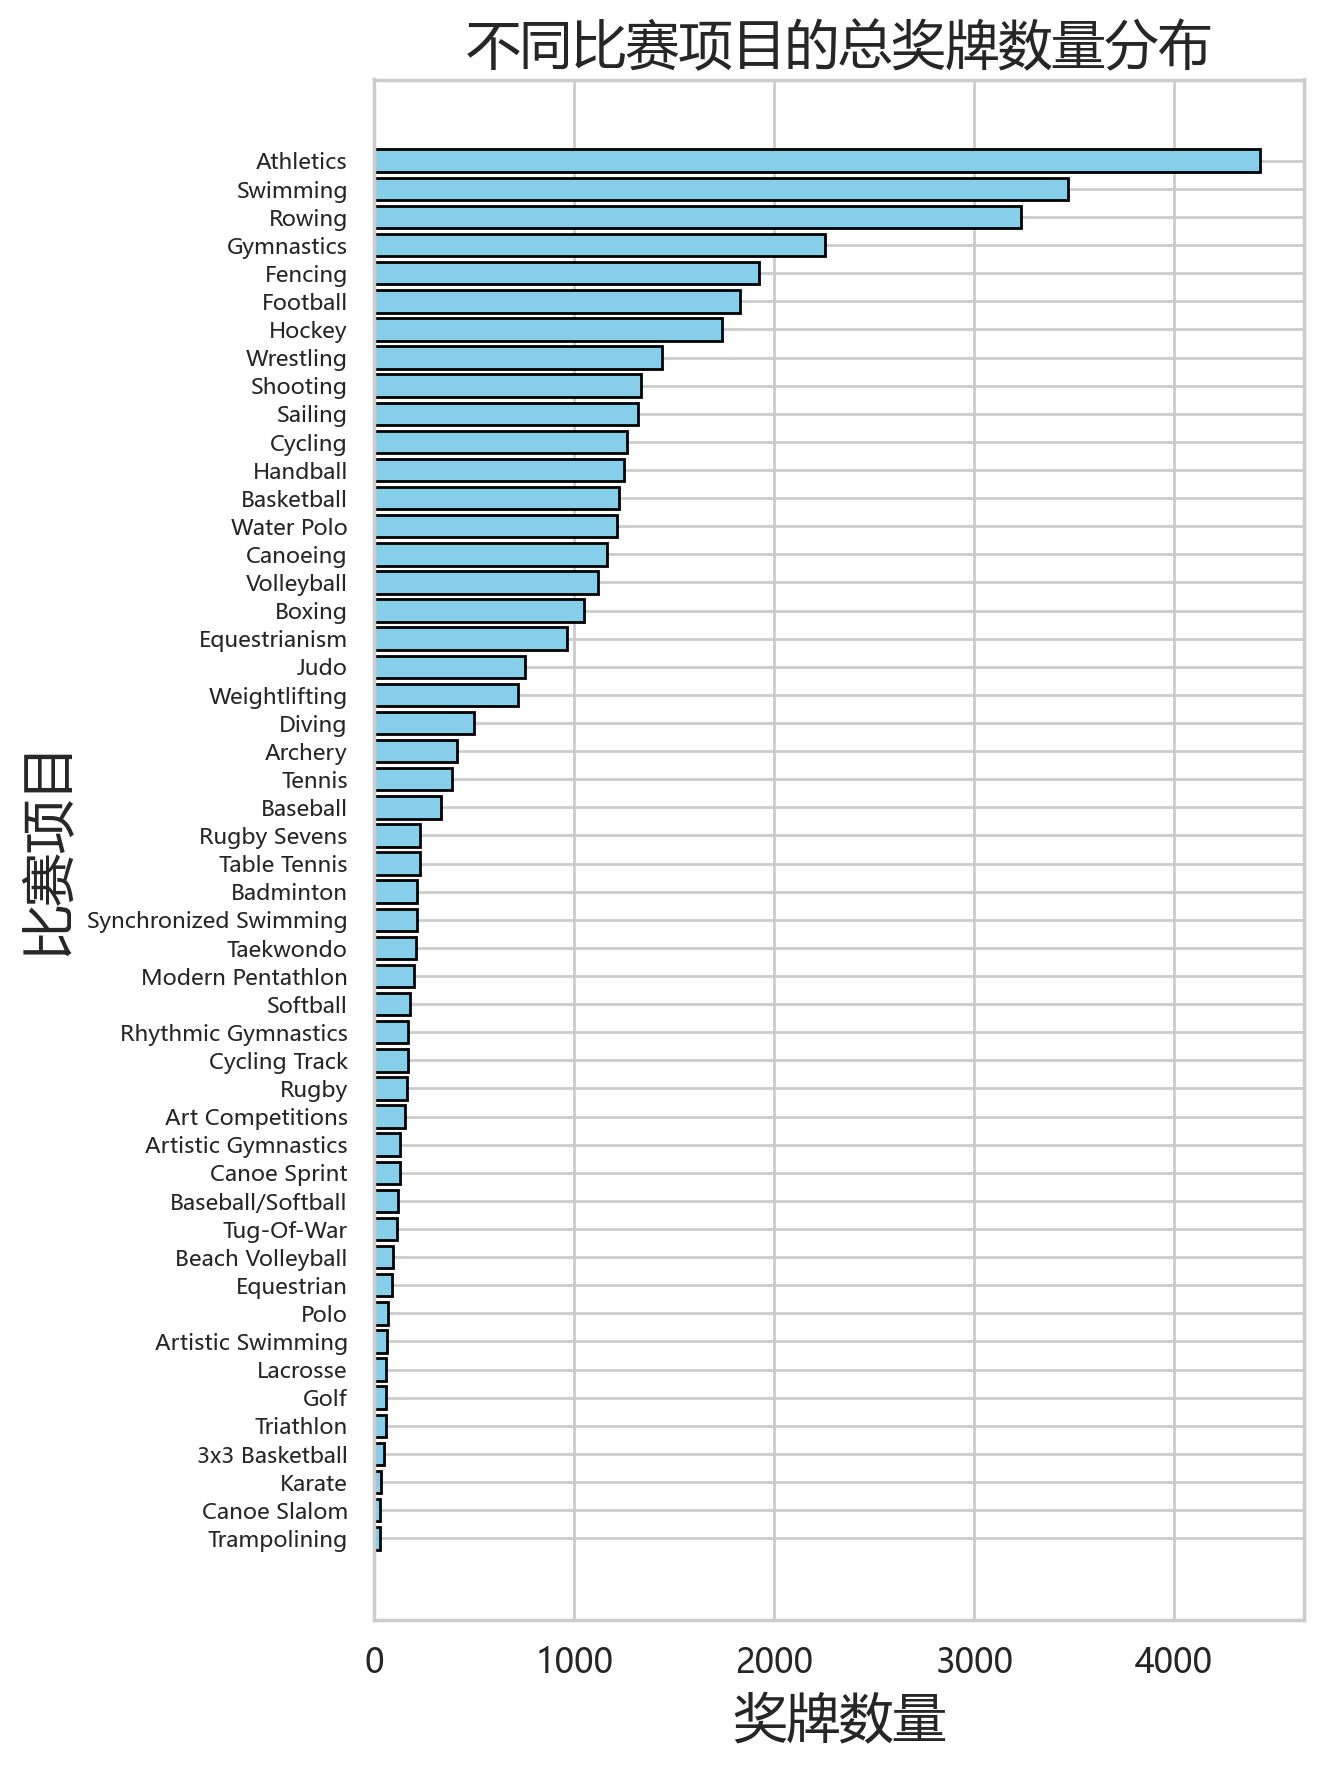

In [15]:


#生成数据
tem2 = tem['Sport'].value_counts()[:50].sort_values(ascending=True)
categories = tem2.index
values = tem2.values
#设置图表大小
plt.figure(figsize=(6,10))
#创建水平条形图
plt.barh(categories,values,color='skyblue',edgecolor='black')
plt.xticks(fontsize=12)
plt.yticks(range(50),categories,fontsize=8)
#添加标题和标签
plt.xlabel(f'奖牌数量')
plt.ylabel('比赛项目')
plt.title('不同比赛项目的总奖牌数量分布')
plt.savefig(f'不同比赛项目的总奖牌数量分布.png',dpi=500,bbox_inches='tight')
#显示图形
plt.show()

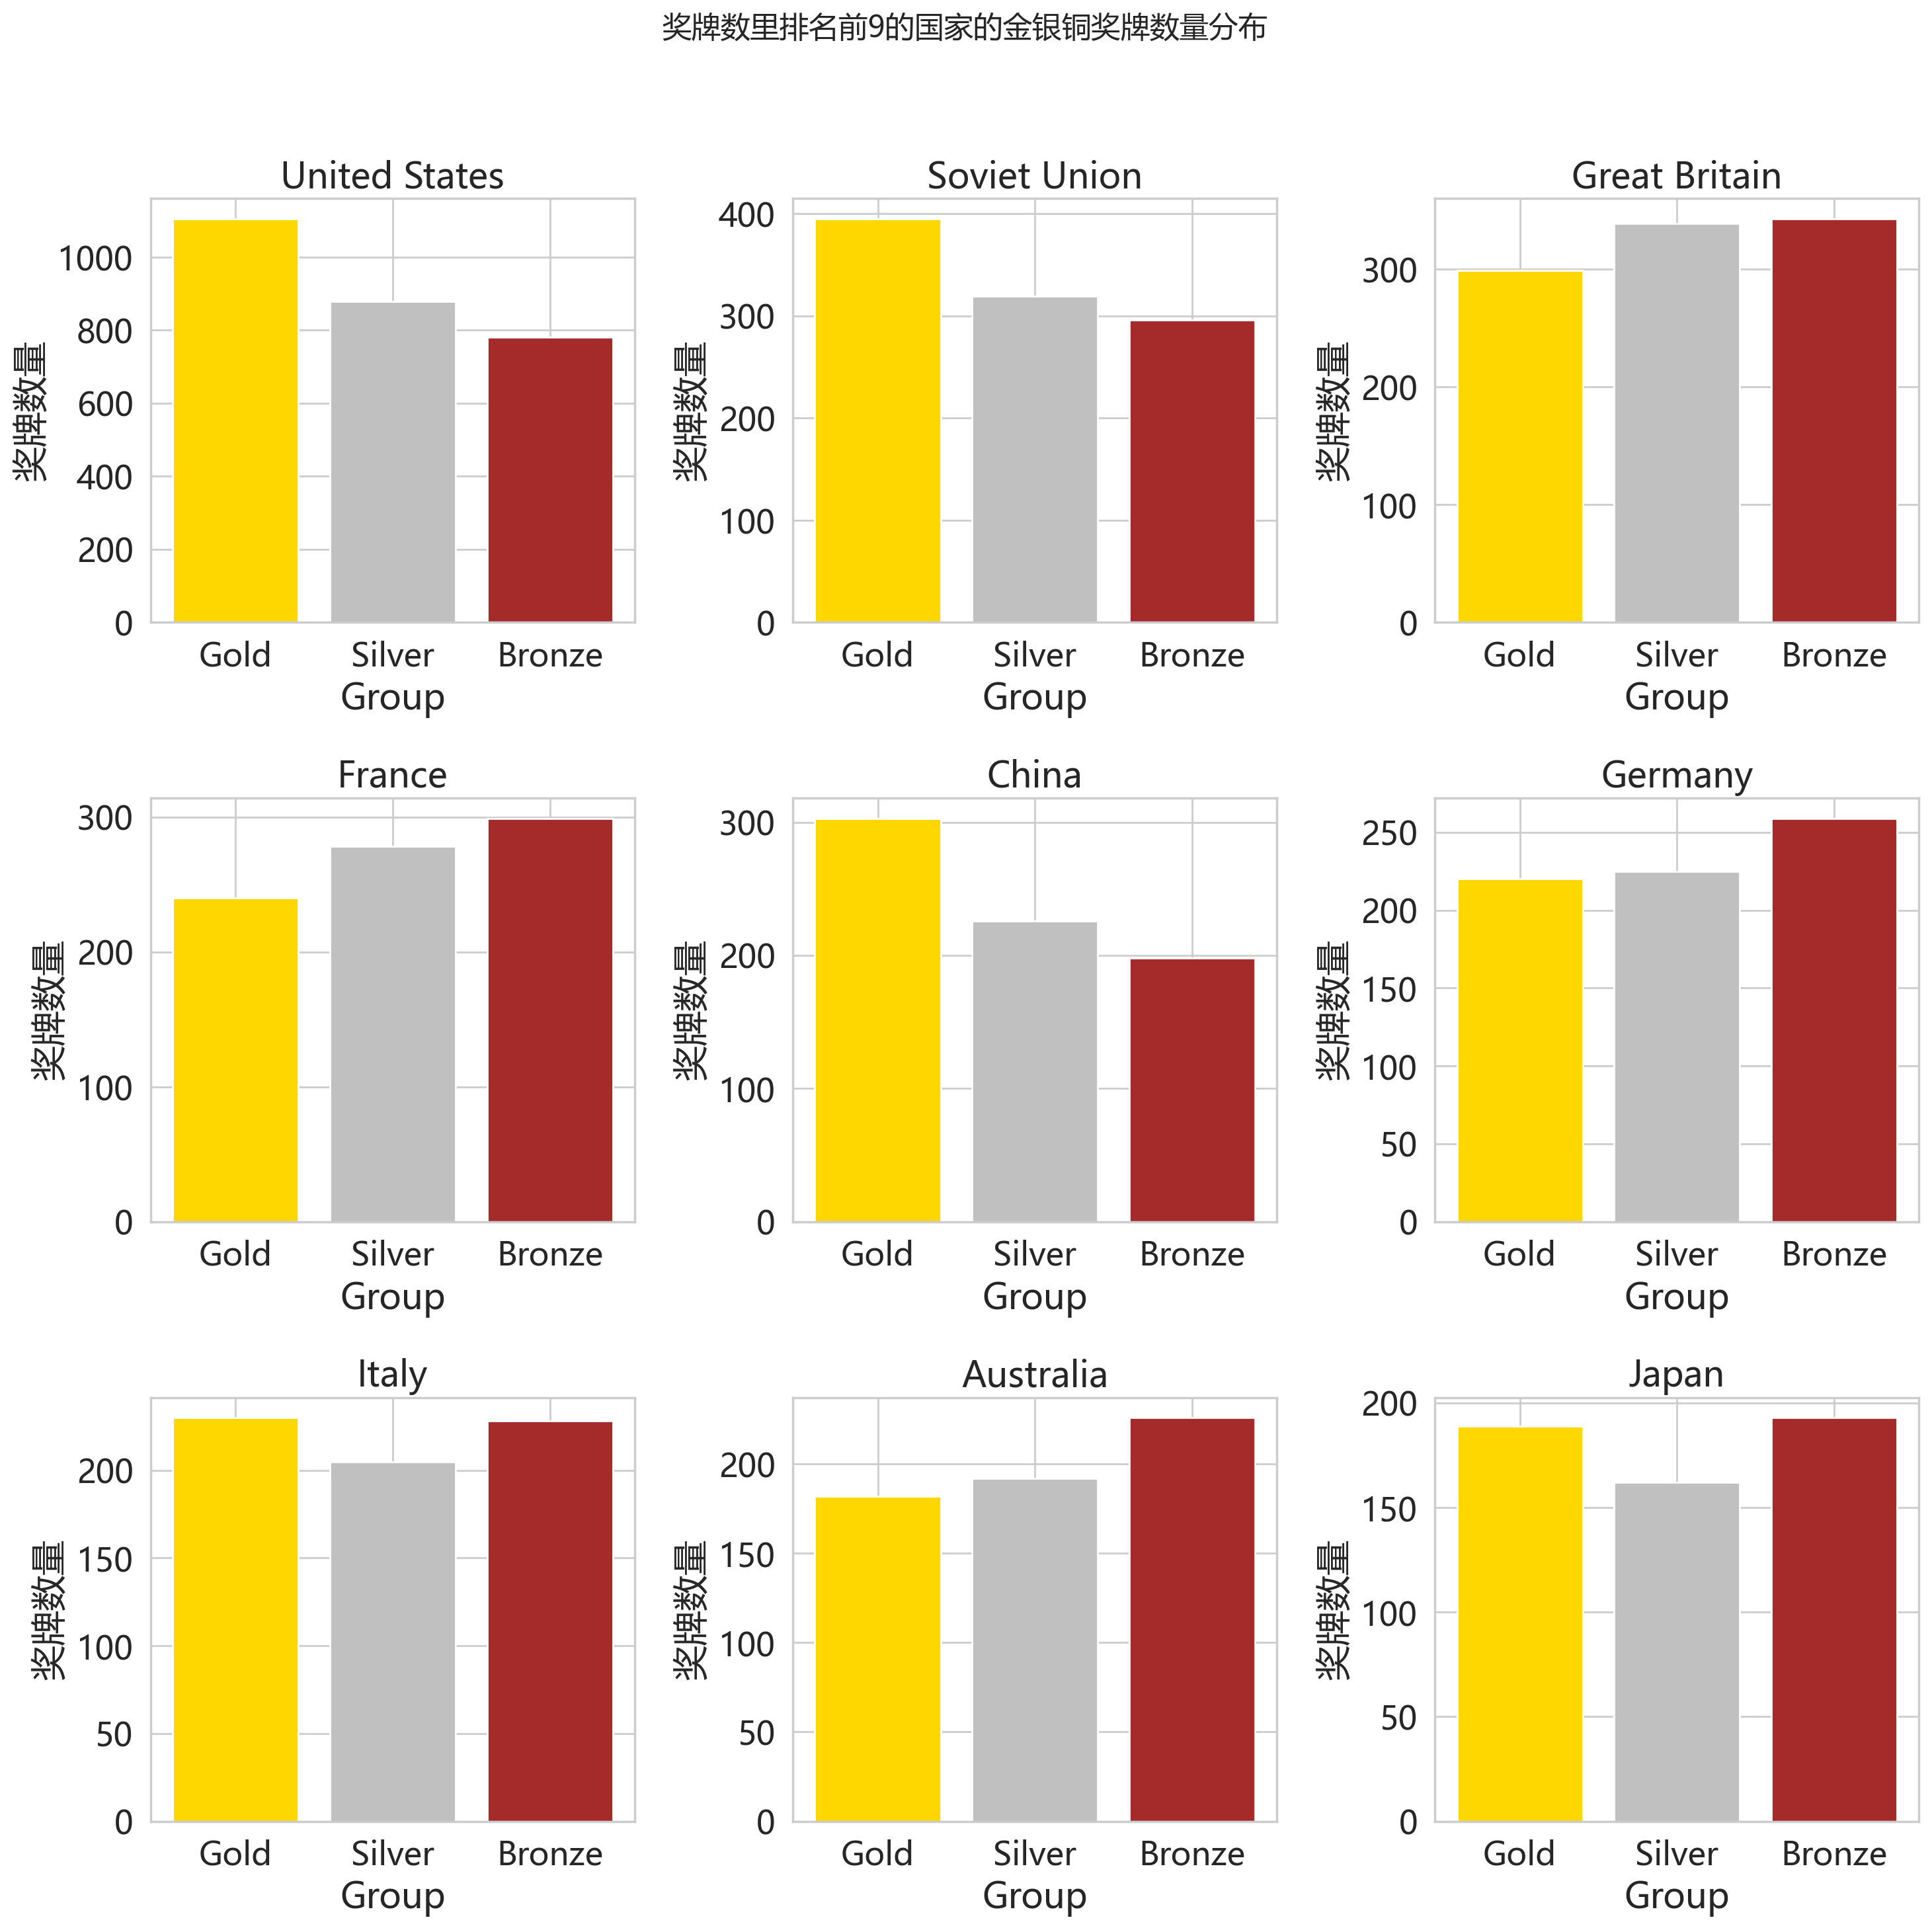

In [18]:
tem2 = df3.groupby('NOC').sum()[['Gold','Silver','Bronze','Total']].reset_index().sort_values(by='Total',ascending=False)
ls = tem2['NOC'].values

#创建一个3x3的子图布局
fig,axes = plt.subplots(3,3,figsize=(15,15))

#扁平化axes数组，以便迭代
axes = axes.flatten()

for i,ax in enumerate(axes):
    category_data=tem2[tem2['NOC'] == ls[i]]  #筛选出该类别的数据
    #绘制条形图
    groups = ['Gold','Silver','Bronze']
    values = category_data[['Gold','Silver','Bronze']].values [0]
    ax.bar(groups,values,color=['gold','silver','brown'])  #为每个条形选择颜色
    #设置每个子图的标题和标签
    ax.set_title(ls[i])
    ax.set_xlabel('Group')
    ax.set_ylabel('奖牌数量')
#添加总标题
fig.suptitle('奖牌数里排名前9的国家的金银铜奖牌数量分布',fontsize=16)
#调整布局，防止子图重叠
plt.tight_layout(rect=[0,0,1,0.96])   #保证总标题不会与子留重叠
plt.savefig(f'奖牌数量排名前9的国家的金银铜奖牌数量分布.png',dpi=500,bbox_inches='tight')
#展示图形
plt.show ()

In [24]:


ls = df3.groupby('NOC')["Total"].sum().sort_values(ascending=False).index[:50]
tem2 = df3[df3.NOC.isin(ls)]

,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,11,7,2,20,1896
1,2,Greece,10,18,19,47,1896
2,3,Germany,6,5,2,13,1896
3,4,France,5,4,2,11,1896
4,5,Great Britain,2,3,2,7,1896


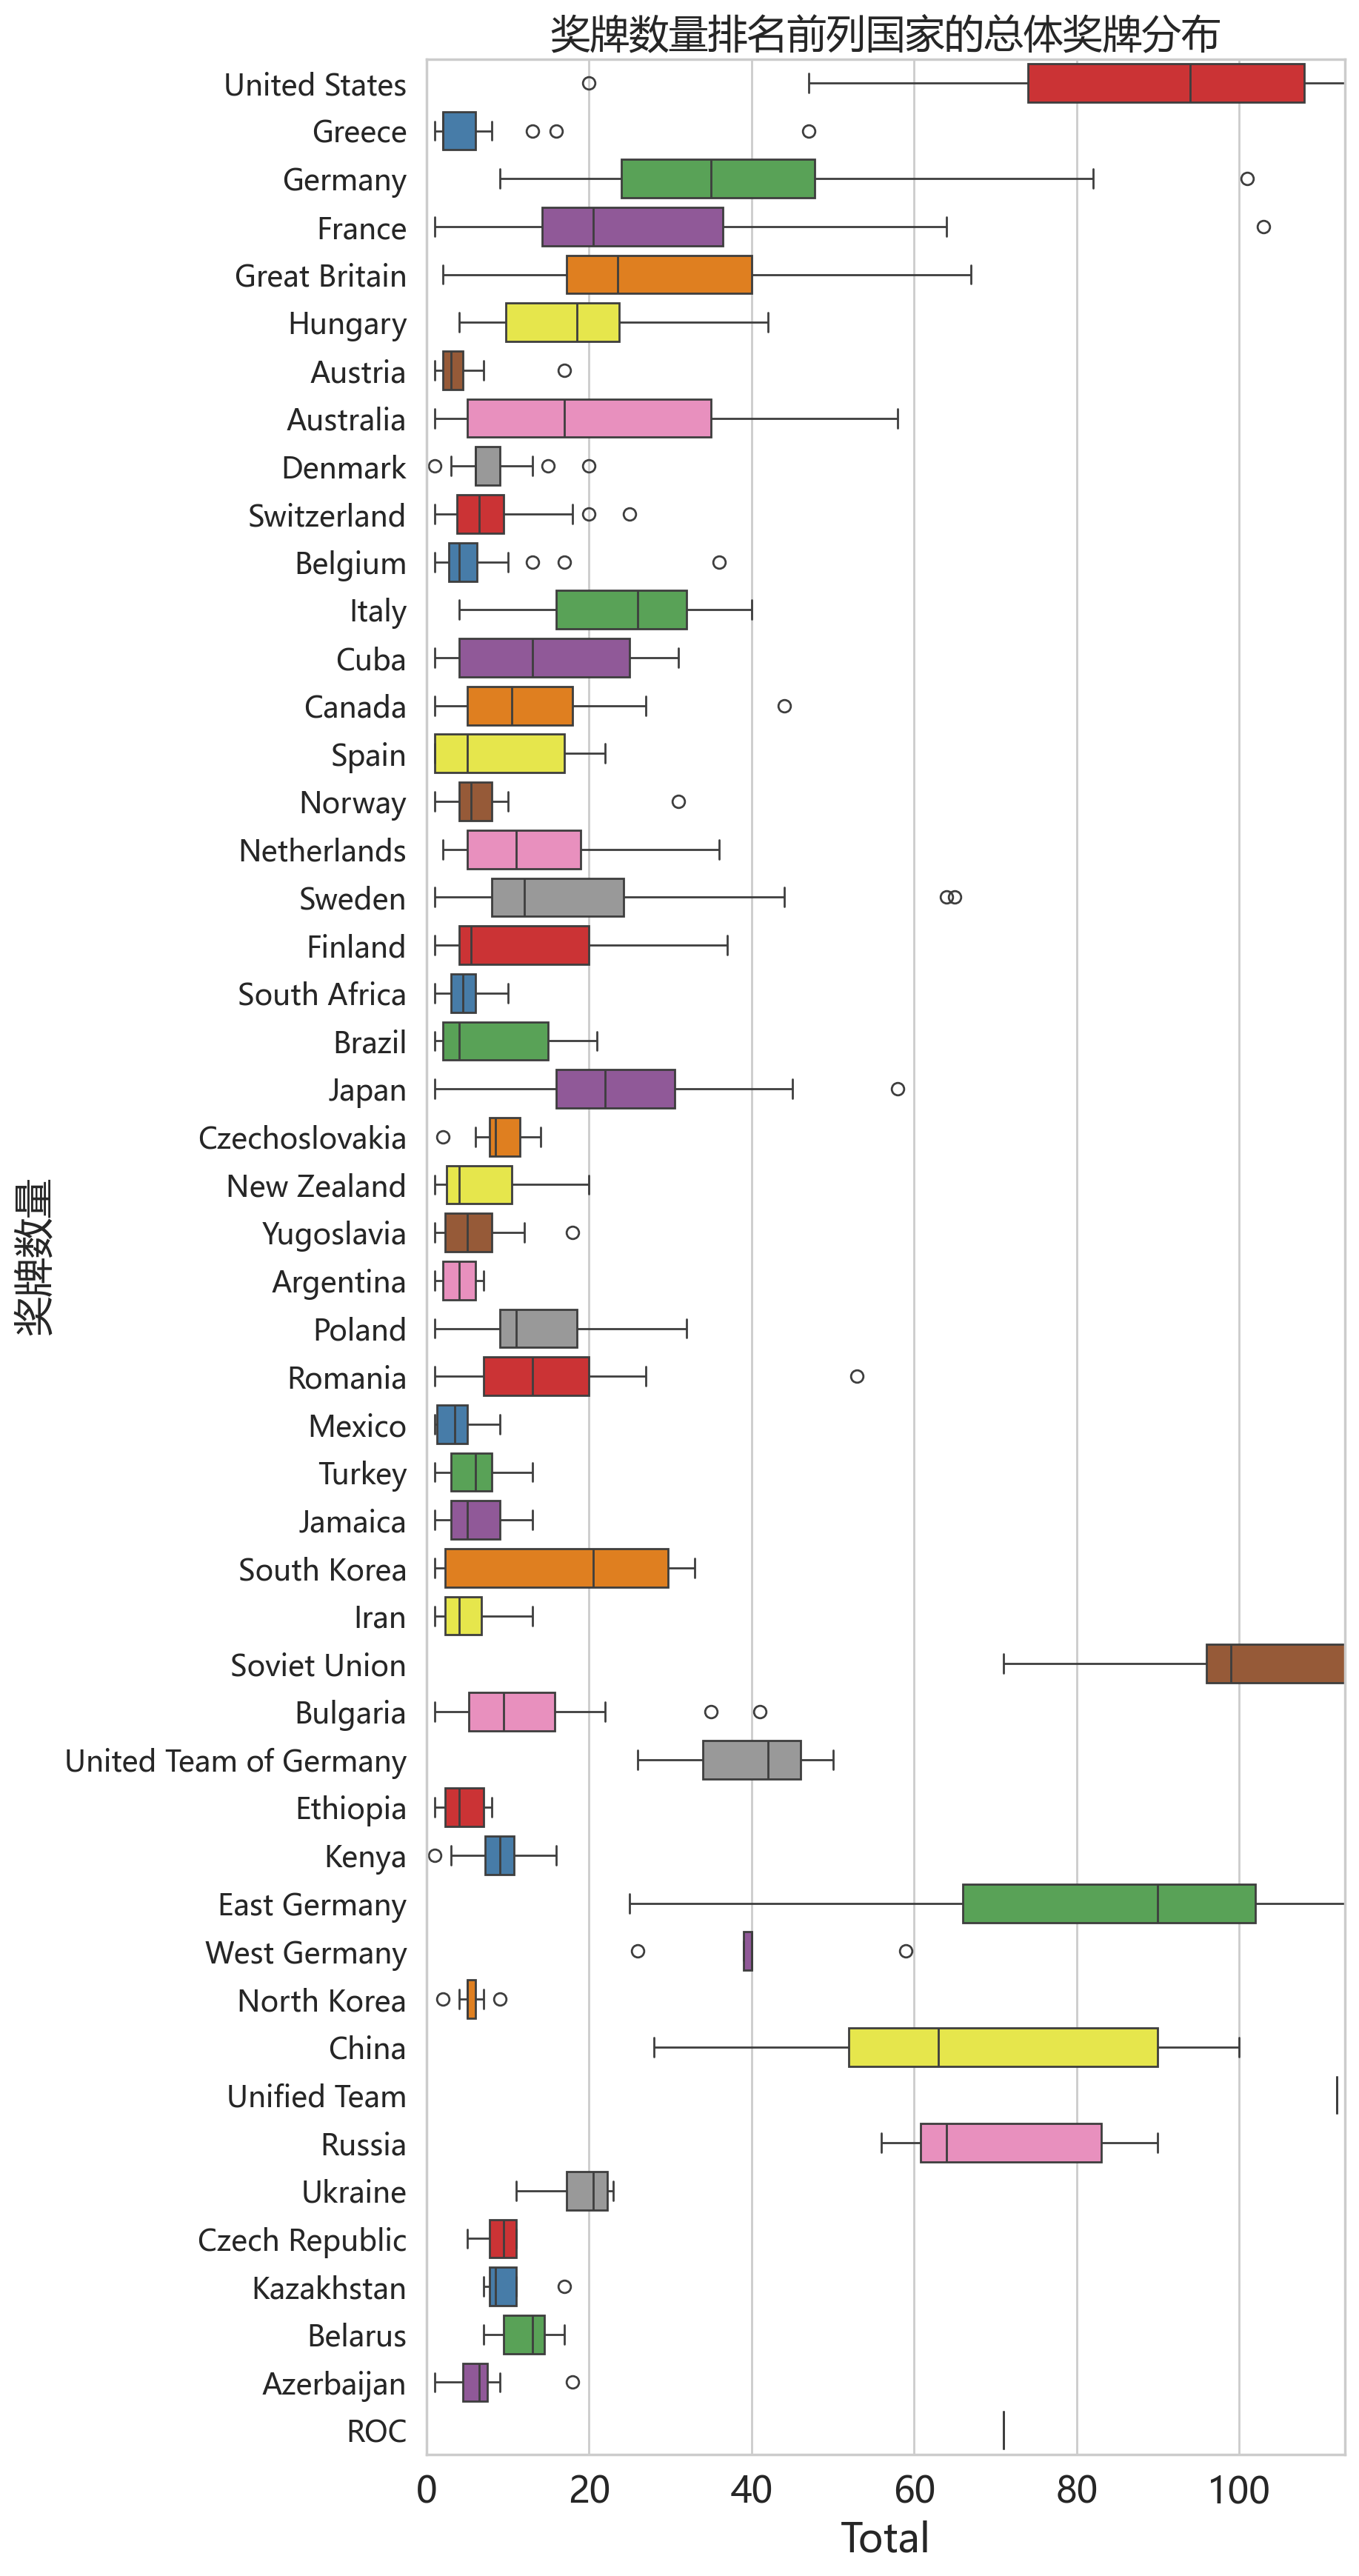

In [25]:

plt.figure (figsize=(8,0.42*len(tem2['NOC'].unique ())))
sns.boxplot(data = tem2,y = "NOC" , x = "Total",palette = "Set1") #颜色
plt.ylabel('奖牌数量')
plt.title(f'奖牌数量排名前列国家的总体奖牌分布')
plt.yticks(fontsize = 14)
plt.xlim(0,tem2['Total'].sort_values().values[-10])
plt.savefig('奖牌数里排名前列国家的总体奖牌分布.png',dpi=500,bbox_inches='tight')
plt.show ()


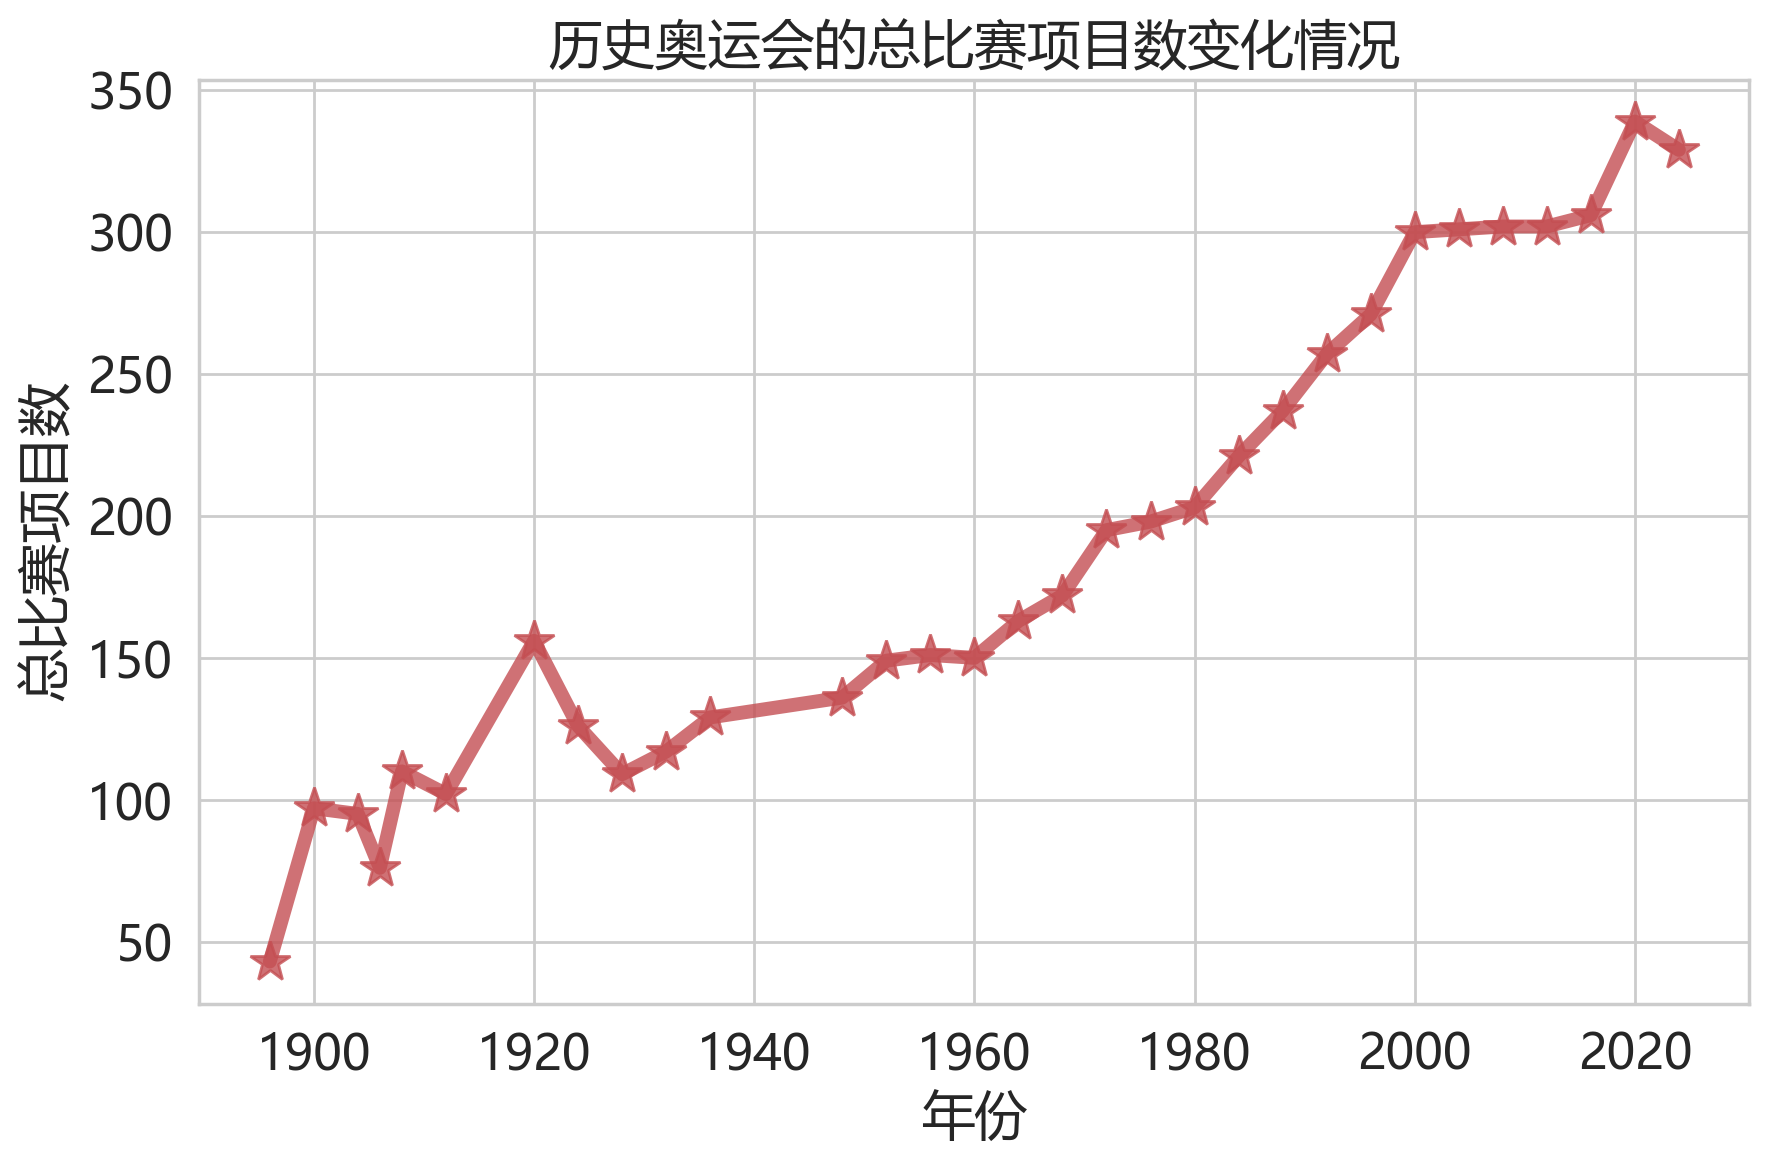

In [34]:
year=['1896','1900','1904',"1906*",'1908','1912','1920','1924','1928','1932','1936',
    '1948','1952','1956','1960','1964','1968','1972','1976','1980','1984',
    '1988','1992','1996','2000','2004','2008','2012','2016','2020','2024']
plt.figure(figsize=(10,6))
y1 = df4.iloc[71][year].values
y1 = [int(i) for i in y1]
plt.plot(x,y1,c='r',linestyle='-',marker='*',markersize=15,markerfacecolor='r',alpha=0.8,linewidth=5)
plt.title('历史奥运会的总比赛项目数变化情况')
plt.xlabel('年份')
plt.ylabel('总比赛项目数')
plt.savefig('历史奥运会的总比赛项目数变化情况.png',dpi=500,bbox_inches='tight')
#显示图形
plt.show()


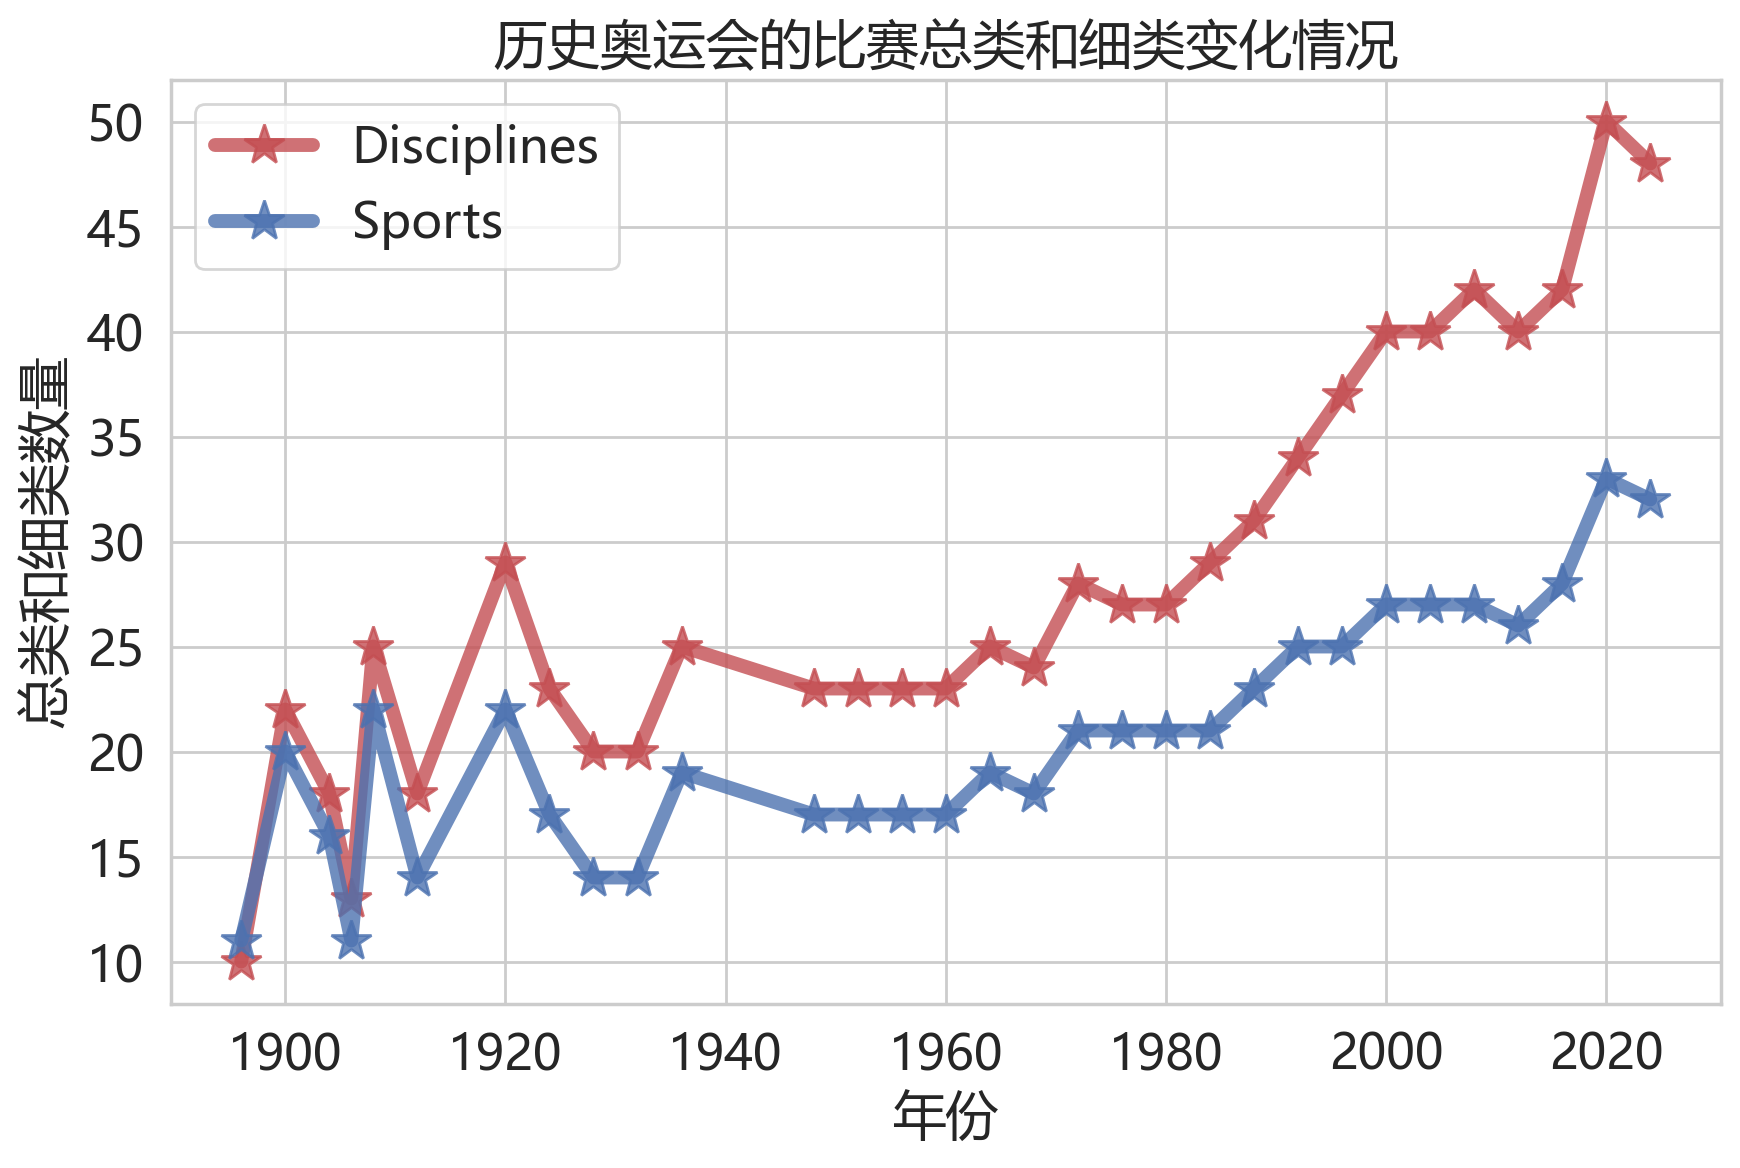

In [40]:
year=['1896','1900','1904',"1906*",'1908','1912','1920','1924','1928','1932','1936',
    '1948','1952','1956','1960','1964','1968','1972','1976','1980','1984',
    '1988','1992','1996','2000','2004','2008','2012','2016','2020','2024']
plt.figure(figsize=(10,6))
y1 = df4.iloc[72][year].values
y1 = [int(i) for i in y1]
y2 = df4.iloc[73][year].values
y2 = [int(i) for i in y2]
plt.plot(x,y1,c='r',linestyle='-',marker='*',markersize=15,markerfacecolor='r',alpha=0.8,linewidth=5,label='Disciplines')
plt.plot(x,y2,c='b',linestyle='-',marker='*',markersize=15,markerfacecolor='b',alpha=0.8,linewidth=5,label='Sports')
plt.title('历史奥运会的比赛总类和细类变化情况')
plt.xlabel('年份')
plt.ylabel('总类和细类数量')
plt.legend()
plt.savefig('历史奥运会的比赛总类和细类变化情况.png',dpi=500,bbox_inches='tight')
#显示图形
plt.show()


In [4]:
# 计算分项目的奖牌积累数量
import pandas as pd

In [31]:
df1 =pd.read_csv('gold_data.csv',encoding="windows-1252")

In [32]:
# 以美国为例，计算美国在分项目获得的奖牌的总数（年份累加）

In [33]:
USA_gold = df1[df1['NOC']=="United States"]
USA_gold.reset_index(drop=True,inplace=True)
USA_gold.head()


,NOC,Year,Is_Host,Gold,3x3 Basketball,Archery,Artistic Gymnastics,Artistic Swimming,Athletics,Badminton,...,Table Tennis,Taekwondo,Tennis,Trampoline Gymnastics,Trampolining,Triathlon,Volleyball,Water Polo,Weightlifting,Wrestling
0,United States,1952,0,38,0,0,0,0,15,0,...,0,0,0,0,0,0,0,0,4,1
1,United States,1956,0,31,0,0,0,0,16,0,...,0,0,0,0,0,0,0,0,4,0
2,United States,1960,0,33,0,0,0,0,12,0,...,0,0,0,0,0,0,0,0,1,3
3,United States,1964,0,36,0,0,0,0,14,0,...,0,0,0,0,0,0,0,0,0,0
4,United States,1968,0,45,0,0,0,0,15,0,...,0,0,0,0,0,0,0,0,0,0


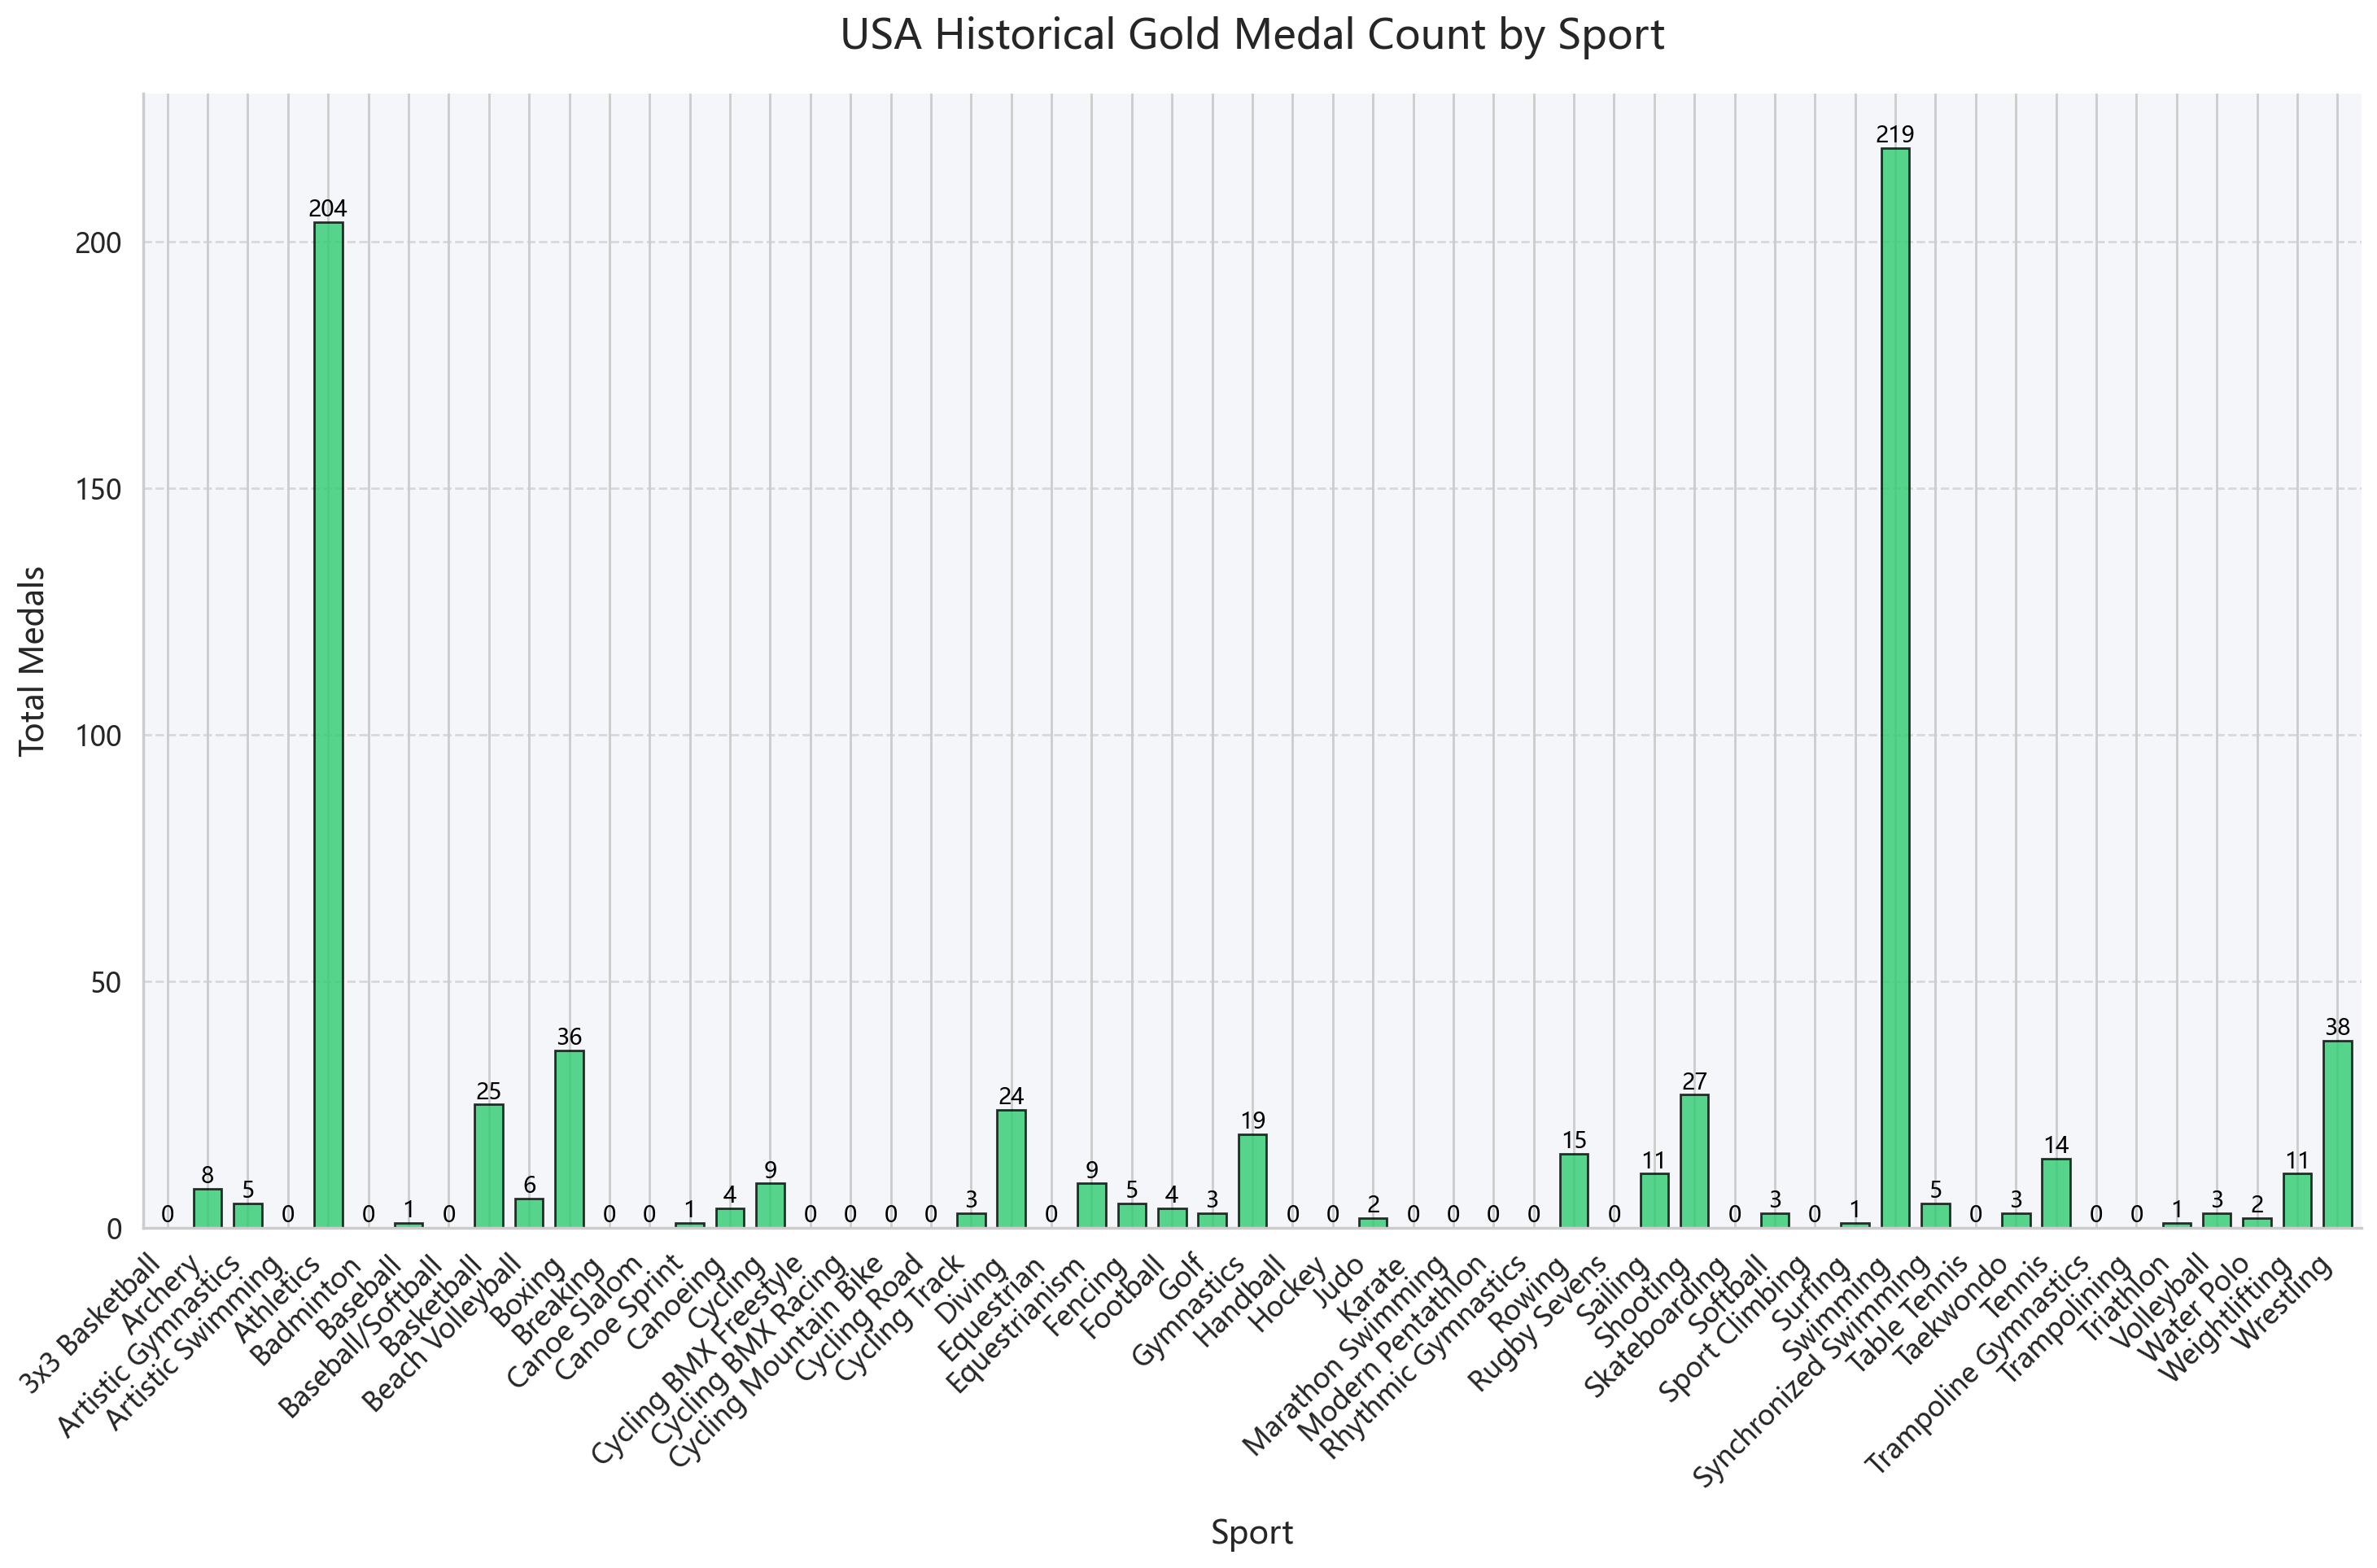

In [34]:
ax = USA_gold.iloc[:,4:].sum(axis=0).plot(
    kind='bar',
    figsize=(15, 10),
    color='#2ecc71',          # 修改条形颜色（这里用绿色示例）
    edgecolor='black',        # 条形边框颜色
    width=0.7,                # 控制条形宽度（0~1）
    alpha=0.8                 # 透明度（0~1）
)

# 添加标题和标签
plt.title("USA Historical Gold Medal Count by Sport", fontsize=18, pad=20)
plt.xlabel("Sport", fontsize=14, labelpad=10)
plt.ylabel("Total Medals", fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)  # 旋转x轴标签
plt.yticks(fontsize=12)

# 添加数值标签
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}", 
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )

# 网格线优化
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 边框和背景优化
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#cccccc')
ax.set_facecolor('#f5f6fa')  # 设置背景色

# 调整布局
plt.tight_layout()
plt.show()

In [94]:
# 计算该国历史表现
# 历史表现的计算：该国在该项目上获得的历史奖牌数除以该项目总的奖牌数
# 加权计算。认为金牌权重为1，银牌为0.5，铜牌为0.2
# 奖牌与权重的转换
import numpy as np

In [58]:
USA_silver = pd.read_csv('silver_data.csv',encoding="windows-1252")
USA_bronze = pd.read_csv('bronze_data.csv',encoding="windows-1252")

USA_silver = USA_silver[USA_silver['NOC']=="United States"]
USA_silver.reset_index(drop=True,inplace=True)
USA_bronze = USA_bronze[USA_bronze['NOC']=="United States"]
USA_bronze.reset_index(drop=True,inplace=True)

In [59]:
USA_silver.iloc[:,3:] = USA_silver.iloc[:,3:].apply(lambda x: x*0.5, axis=1)
USA_bronze.iloc[:,3:] = USA_bronze.iloc[:,3:].apply(lambda x: x*0.2, axis=1)

In [60]:
USA_silver.head(10)

,NOC,Year,Is_Host,Silver,3x3 Basketball,Archery,Artistic Gymnastics,Artistic Swimming,Athletics,Badminton,...,Table Tennis,Taekwondo,Tennis,Trampoline Gymnastics,Trampolining,Triathlon,Volleyball,Water Polo,Weightlifting,Wrestling
0,United States,1952,0,9.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,United States,1956,0,12.5,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5
2,United States,1960,0,10.5,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,United States,1964,0,12.5,0.0,0.0,0.0,0.0,3.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0
4,United States,1968,0,14.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,United States,1972,0,15.5,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,United States,1976,0,17.5,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.5
7,United States,1984,0,30.5,0.0,0.5,0.0,0.0,7.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,1.5
8,United States,1988,0,15.5,0.0,0.5,0.0,0.0,3.5,0.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.5
9,United States,1992,0,17.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5


In [63]:
USA_bronze.head(10)

,NOC,Year,Is_Host,Bronze,3x3 Basketball,Archery,Artistic Gymnastics,Artistic Swimming,Athletics,Badminton,...,Table Tennis,Taekwondo,Tennis,Trampoline Gymnastics,Trampolining,Triathlon,Volleyball,Water Polo,Weightlifting,Wrestling
0,United States,1952,0,3.4,0.0,0.0,0.0,0.0,1.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
1,United States,1956,0,3.4,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2
2,United States,1960,0,3.0,0.0,0.0,0.0,0.0,1.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0
3,United States,1964,0,5.0,0.0,0.0,0.0,0.0,0.6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2
4,United States,1968,0,6.8,0.0,0.0,0.0,0.0,1.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0
5,United States,1972,0,6.0,0.0,0.0,0.0,0.0,1.6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.2
6,United States,1976,0,5.0,0.0,0.0,0.0,0.0,1.6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4
7,United States,1984,0,6.0,0.0,0.0,0.0,0.0,1.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2
8,United States,1988,0,5.4,0.0,0.2,0.0,0.0,1.2,0.0,...,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.6
9,United States,1992,0,7.4,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.2,0.0,0.0,0.0,0.4,0.0,0.0,0.4


In [88]:
# 依然以美国为例
USA_bronze = USA_bronze.rename(columns={"Bronze": "total_value"})
USA_gold = USA_gold.rename(columns={"Gold": "total_value"})
USA_silver = USA_silver.rename(columns={"Silver": "total_value"})

avg = USA_bronze.iloc[:,3:]+USA_silver.iloc[:,3:]+USA_gold.iloc[:,3:]
avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_value            18 non-null     float64
 1   3x3 Basketball         18 non-null     float64
 2   Archery                18 non-null     float64
 3   Artistic Gymnastics    18 non-null     float64
 4   Artistic Swimming      18 non-null     float64
 5   Athletics              18 non-null     float64
 6   Badminton              18 non-null     float64
 7   Baseball               18 non-null     float64
 8   Baseball/Softball      18 non-null     float64
 9   Basketball             18 non-null     float64
 10  Beach Volleyball       18 non-null     float64
 11  Boxing                 18 non-null     float64
 12  Breaking               18 non-null     float64
 13  Canoe Slalom           18 non-null     float64
 14  Canoe Sprint           18 non-null     float64
 15  Canoeing

In [89]:
avg.head()

,total_value,3x3 Basketball,Archery,Artistic Gymnastics,Artistic Swimming,Athletics,Badminton,Baseball,Baseball/Softball,Basketball,...,Table Tennis,Taekwondo,Tennis,Trampoline Gymnastics,Trampolining,Triathlon,Volleyball,Water Polo,Weightlifting,Wrestling
0,50.4,0.0,0.0,0.0,0.0,21.2,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.2
1,46.9,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.2,0.7
2,46.5,0.0,0.0,0.0,0.0,17.2,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.2,3.0
3,53.5,0.0,0.0,0.0,0.0,18.1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.2
4,65.8,0.0,0.0,0.0,0.0,19.4,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,1.0


In [90]:
avg.insert(0,"Year", USA_bronze["Year"])
avg.head(10)

,Year,total_value,3x3 Basketball,Archery,Artistic Gymnastics,Artistic Swimming,Athletics,Badminton,Baseball,Baseball/Softball,...,Table Tennis,Taekwondo,Tennis,Trampoline Gymnastics,Trampolining,Triathlon,Volleyball,Water Polo,Weightlifting,Wrestling
0,1952,50.4,0.0,0.0,0.0,0.0,21.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.2
1,1956,46.9,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.2,0.7
2,1960,46.5,0.0,0.0,0.0,0.0,17.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.2,3.0
3,1964,53.5,0.0,0.0,0.0,0.0,18.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.2
4,1968,65.8,0.0,0.0,0.0,0.0,19.4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,1.0
5,1972,54.5,0.0,2.0,0.0,0.0,11.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,4.2
6,1976,56.5,0.0,2.0,0.0,0.0,11.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,2.9
7,1984,118.5,0.0,1.5,0.0,0.0,25.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.5,0.7,10.7
8,1988,56.9,0.0,1.7,0.0,0.0,17.7,0.0,0.0,0.0,...,0.0,0.0,2.9,0.0,0.0,0.0,1.0,0.5,0.0,3.1
9,1992,61.4,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,...,0.0,0.0,2.2,0.0,0.0,0.0,0.4,0.0,0.0,4.9


Text(0.5, 1.0, 'Total_Medal_value')

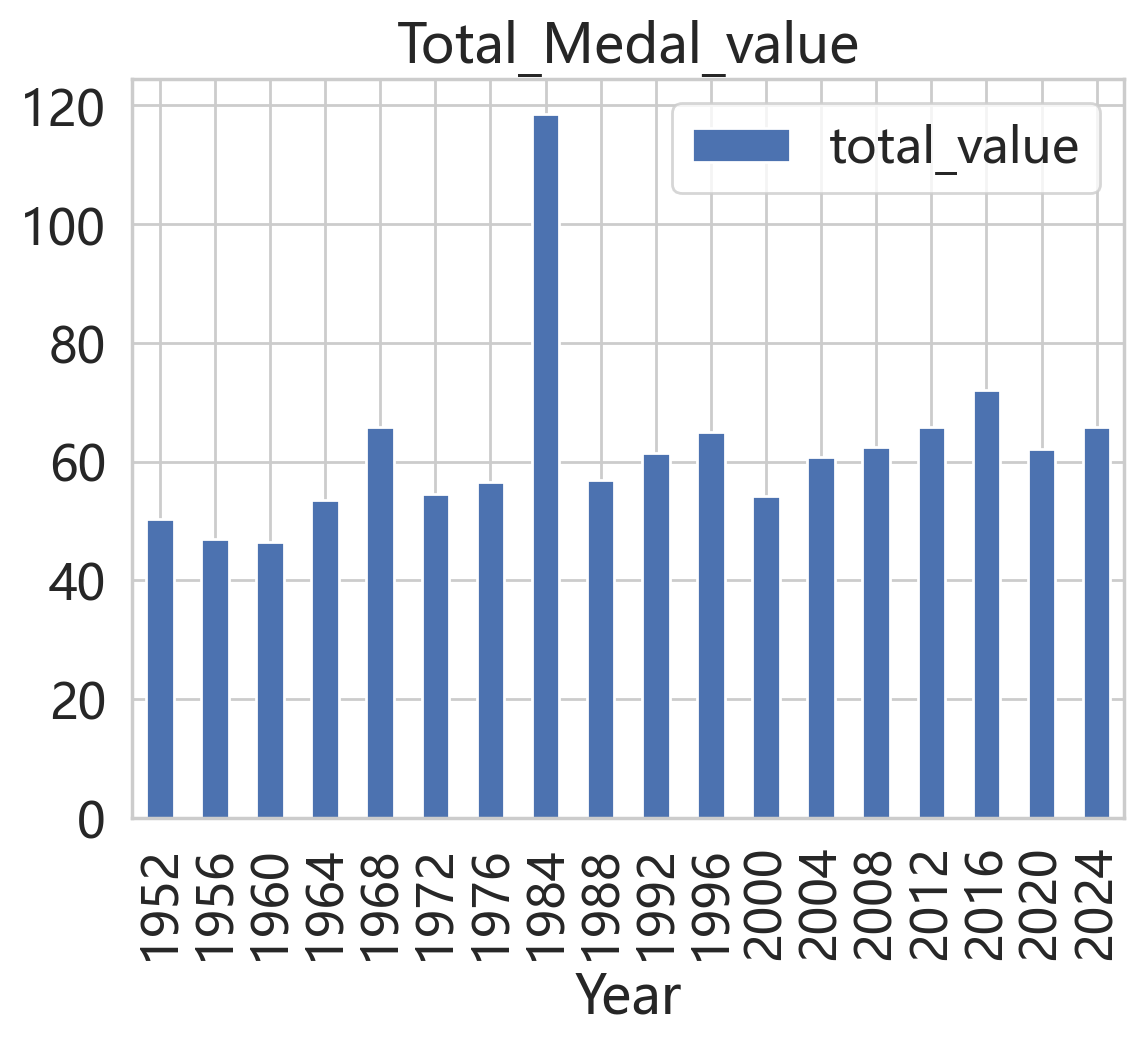

In [96]:
avg.plot(kind="bar", x="Year", y="total_value")
plt.title("Total_Medal_value")

In [ ]:
# 绘出项目奖牌价值
# 读取项目数据

In [ ]:
program = pd.read